In [2]:
import pandas as pd
from bs4  import BeautifulSoup
import numpy as np
import plotly.express as px
import seaborn as sns

# Restaurants

In [12]:
resto_soup = pd.read_csv('restaurant_soup').drop(columns='Unnamed: 0').squeeze()
resto_soup2 = pd.read_csv('restaurant_soup2.csv').drop(columns='Unnamed: 0').squeeze()

In [253]:
resto_soup2.index

Index(['Cerveseria Catalana', 'My Fucking Restaurant', 'Ciutat Comtal',
       'Tapeo', 'Arume', 'Taquerías Tamarindo', 'Vinitus', 'Somorrostro',
       'Cañete', 'Firebug',
       ...
       'Chez Cocó', 'Portolés', 'Bo de Gracia', 'Margherita', 'Bar Nolla',
       'Casa Dorita', 'Palmito Beach Bar', 'Takumi Sapporo Ramen Kitchen',
       'Bosque Palermo', 'Son Hao'],
      dtype='object', length=207)

In [254]:
resto_soup.index


Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')

#### Name

In [13]:
# restaurant name
name = []
for row in resto_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)

In [256]:
# It's like there are duplicates
pd.Series(name).value_counts()

La Paradeta        5
Macchina           2
Pirineu en Boca    2
Kamasot            2
Obe Restaurant     2
                  ..
Cecconi’s          1
Ugot Bruncherie    1
Arume              1
Hummus             1
El Venezia         1
Length: 207, dtype: int64

#### Price range

In [14]:
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)


In [258]:
# test
for n, price in zip(name, price_range):
    print(n, price) 


Cerveseria Catalana €€
My Fucking Restaurant €€€
Ciutat Comtal €€
Tapeo €€
Arume €€
Taquerías Tamarindo €
Vinitus €€
Somorrostro €€
Cañete €€€
Firebug €€
El Nacional €€
Firebug €€
Tucco Real Food Born €
Disfrutar €€€€
Tosca €€
Brunch & Cake €€
Can Paixano €
El Pintxo de Petritxol €€
Boa-Bao nan
El Asador de Aranda €€€
El Asador de Aranda €€€
Restaurant La Tasqueta de Blai €
Telefèric €€
Arcano €€€
Tickets €€€€
El Jardín del Edén nan
Cera 23 €€
A Tu Bola €
Guell €€
Bar Mut €€€
Buenos Aires €€
Le Romane nan
La Pepita €€
Bar Mut €€€
Cachitos €€
2254 €€€
Federal €
A Tu Bola €
Lizarran €
Momo €€
Paradiso €€
Sensi €€
Alsur Café €
2254 €€€
Maitea €€
Federal €
Betlem €€
Llamber €€€
Micu Maku €
O’Toxo 3 Hermanos €€
Bilbao Berria €€
La Cuina de Laietana €€
Macchina €
Bo de Boqueria nan
Caravelle €€
La Bodegueta €€€
Raó nan
Terrace la Isabela €€€
El Vaso de Oro €€
9 Nine €€€
Paco Alcalde €€
Xian nan
Casa Alfonso €€
La Caravana €
Mosquito €
Nubar nan
Quimet & Quimet €€
La Bombeta €€
Billy Brunch n

#### Rating

In [15]:
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        

In [260]:
# test
for n, rat in zip(name, rating):
    print(n, rat) 

Cerveseria Catalana 4.5
My Fucking Restaurant 4.5
Ciutat Comtal 4
Tapeo 4.5
Arume 4.5
Taquerías Tamarindo 4.5
Vinitus 4.5
Somorrostro 4.5
Cañete 4.5
Firebug 4.5
El Nacional 4
Firebug 4.5
Tucco Real Food Born 4.5
Disfrutar 5
Tosca 4.5
Brunch & Cake 4
Can Paixano 4.5
El Pintxo de Petritxol 4.5
Boa-Bao 4.5
El Asador de Aranda 4.5
El Asador de Aranda 4.5
Restaurant La Tasqueta de Blai 4.5
Telefèric 4
Arcano 4.5
Tickets 4.5
El Jardín del Edén 4.5
Cera 23 4.5
A Tu Bola 4.5
Guell 4.5
Bar Mut 4.5
Buenos Aires 4.5
Le Romane 5
La Pepita 4.5
Bar Mut 4.5
Cachitos 4
2254 4.5
Federal 4.5
A Tu Bola 4.5
Lizarran 4
Momo 4.5
Paradiso 4.5
Sensi 4.5
Alsur Café 4
2254 4.5
Maitea 4.5
Federal 4.5
Betlem 4.5
Llamber 4.5
Micu Maku 4.5
O’Toxo 3 Hermanos 4.5
Bilbao Berria 4
La Cuina de Laietana 4.5
Macchina 4.5
Bo de Boqueria 5
Caravelle 4.5
La Bodegueta 4
Raó 4.5
Terrace la Isabela 4.5
El Vaso de Oro 4.5
9 Nine 5
Paco Alcalde 4.5
Xian 4.5
Casa Alfonso 4
La Caravana 5
Mosquito 4
Nubar 4.5
Quimet & Quimet 4.5
La 

#### Reviews

In [16]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Cerveseria Catalana 1279
My Fucking Restaurant 89
Ciutat Comtal 1120
Tapeo 451
Arume 633
Taquerías Tamarindo 208
Vinitus 304
Somorrostro 368
Cañete 392
Firebug 125
El Nacional 330
Firebug 125
Tucco Real Food Born 618
Disfrutar 110
Tosca 240
Brunch & Cake 852
Can Paixano 378
El Pintxo de Petritxol 109
Boa-Bao 6
El Asador de Aranda 28
El Asador de Aranda 28
Restaurant La Tasqueta de Blai 230
Telefèric 178
Arcano 292
Tickets 195
El Jardín del Edén 16
Cera 23 555
A Tu Bola 79
Guell 64
Bar Mut 149
Buenos Aires 55
Le Romane 12
La Pepita 514
Bar Mut 149
Cachitos 98
2254 62
Federal 55
A Tu Bola 79
Lizarran 52
Momo 23
Paradiso 105
Sensi 377
Alsur Café 325
2254 62
Maitea 128
Federal 55
Betlem 61
Llamber 133
Micu Maku 13
O’Toxo 3 Hermanos 92
Bilbao Berria 152
La Cuina de Laietana 23
Macchina 32
Bo de Boqueria 15
Caravelle 223
La Bodegueta 36
Raó 32
Terrace la Isabela 2
El Vaso de Oro 178
9 Nine 45
Paco Alcalde 41
Xian 11
Casa Alfonso 108
La Caravana 15
Mosquito 144
Nubar 4
Quimet & Quimet 454
La 

#### Location

In [262]:
resto_soup2.shape

(207,)

In [263]:

location = [] 
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '--'.join(adress_elements) )


In [264]:
location

['Carrer de Mallorca, 236--08008 Barcelona--Spain',
 'Carrer Nou de la Rambla, 35--08001 Barcelona--Spain',
 'Rambla de Catalunya, 18--08007 Barcelona--Spain',
 'Carrer de Montcada, 29--08003 Barcelona--Spain',
 "Carrer d'En Botella, 11--08007 Barcelona--Spain",
 'Carrer de Aragón, 236--08007 Barcelona--Spain',
 'Carrer Del Consell de Cent, 333--08007 Barcelona--Spain',
 'Carrer de Sant Carles, 11--08003 Barcelona--Spain',
 'Carrer de la Unió, 17--08001 Barcelona--Spain',
 'Passeig de Sant Joan, 23--08010 Barcelona--Spain',
 'Passeig de Gracia, 24--08007 Barcelona--Spain',
 'Carrer del Consolat de Mar, 23--08003 Barcelona--Spain',
 'Carrer de Villarroel, 163--08036 Barcelona--Spain',
 'Carrer de Sant Pere Més Alt, 8--08003 Barcelona--Spain',
 "Carrer d'Enric Granados, 145--08008 Barcelona--Spain",
 'Carrer de la Reina Cristina, 7--08003 Barcelona--Spain',
 'Carrer de Petritxol, 9--08002 Barcelona--Spain',
 'Plaça del Dr. Letamendi, 1--08007 Barcelona--Spain',
 'Calle Pau Claris, 70--08

#### Website

In [265]:
website = []
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)


In [266]:
website

['http://cerveceriacatalana.food…',
 'http://www.myfuckingrestaurant…',
 nan,
 'http://www.tapeoborn.cat',
 'http://arumerestaurant.com/',
 nan,
 nan,
 'http://www.restaurantesomorros…',
 'http://www.barcanete.com',
 'http://www.firebugbarcelona.co…',
 'http://www.elnacionalbcn.com',
 'http://www.tuccorealfood.com',
 'http://en.disfrutarbarcelona.c…',
 nan,
 'https://brunchandcake.com',
 'http://www.canpaixano.com',
 'http://www.elpintxodepetritxol…',
 'http://www.boabao.es',
 'http://asadordearanda.com/cont…',
 'https://www.latasquetadeblai.c…',
 'http://www.teleferic.es',
 nan,
 'http://www.ticketsbar.es',
 'http://www.jardindeleden.es',
 'http://www.cera23.com',
 'http://www.atubolarest.com/',
 'https://www.guelltapasbarcelon…',
 'http://www.barmut.com/',
 'http://www.bairesbcn.com',
 'http://www.leromane.com',
 'http://www.lapepitabcn.com',
 'http://www.cachitosrambla.com',
 'http://www.restaurante2254.es/',
 'http://www.federalcafe.es/',
 'http://www.lizarran.es',
 'http://momobar

#### Number of photos

In [267]:

nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    

In [268]:
#
# df numbers of pho
for name, photo in zip(resto_soup2.index, nb_photos):
    print(name, photo)

Cerveseria Catalana 3852
My Fucking Restaurant 235
Ciutat Comtal 3450
Tapeo 1114
Arume 1600
Taquerías Tamarindo 326
Vinitus 1075
Somorrostro 905
Cañete 1156
Firebug 258
El Nacional 1326
Tucco Real Food Born 614
Disfrutar 1340
Tosca 404
Brunch & Cake 85
Can Paixano 419
El Pintxo de Petritxol 184
Boa-Bao 20
El Asador de Aranda 105
Restaurant La Tasqueta de Blai 576
Telefèric 416
Arcano nan
Tickets 2292
El Jardín del Edén 43
Cera 23 1224
A Tu Bola 132
Guell 155
Bar Mut 294
Buenos Aires 97
Le Romane 27
La Pepita 1065
Cachitos 237
2254 99
Federal 136
Lizarran 78
Momo 46
Paradiso 280
Sensi nan
Alsur Café 662
Maitea 272
Betlem 161
Llamber 262
Micu Maku 99
O’Toxo 3 Hermanos 191
Bilbao Berria 288
La Cuina de Laietana 39
Macchina 126
Bo de Boqueria 22
Caravelle 444
La Bodegueta 71
Raó 146
Terrace la Isabela 17
El Vaso de Oro 359
9 Nine 146
Paco Alcalde 120
Xian 32
Casa Alfonso 166
La Caravana 15
Mosquito 172
Nubar 30
Quimet & Quimet 1380
La Bombeta 138
Billy Brunch 104
Citizen Café 124
Pinotxo B

#### Opening hours

In [269]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(resto_soup2, resto_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [270]:
# Some restaurants open twice a day...it was hard to get the second time
# Things to based analysis (numbers of openings hours day on average, do they open on the weekend.)
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 



['Cerveseria Catalana', 'Mon', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Tue', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Wed', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Thu', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Fri', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Sat', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Sun', '9:00 AM', '1:30 AM']
['My Fucking Restaurant', 'Mon', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Tue', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Wed', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Thu', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Fri', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Sat', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Sun', '5:00 PM', '12:30 AM']
['Ciutat Comtal', 'Mon', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Tue', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Wed', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Thu', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Fri', '8:00 AM', '1:30 AM']
['

#### Amenities

#### Restaurant dataset

In [18]:
resto_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

# Hotels

In [3]:
hotel_soup = pd.read_csv('hotel_soup.csv').drop(columns='Unnamed: 0').squeeze()
hotel_soup2 = pd.read_csv('hotel_soup2.csv').drop(columns='Unnamed: 0').squeeze()


FileNotFoundError: [Errno 2] No such file or directory: 'hotel_soup.csv'

#### Name

In [5]:
#### Name
name = []
for row in hotel_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)


In [274]:
# It's like there are duplicates
pd.Series(name).value_counts()

St. Christopher’s Inn                         2
Four Points by Sheraton Barcelona Diagonal    2
OD Barcelona                                  2
Chic&Basic Velvet                             2
Acta BCN 40                                   2
                                             ..
K+K Hotel Picasso Barcelona                   1
Hostalin Barcelona                            1
Eurostars Grand Marina                        1
H10 Metropolitan                              1
Hotel Barcelona Universal                     1
Length: 234, dtype: int64

#### Price range

In [6]:
#### Price range
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

# test
for n, price in zip(name, price_range):
    print(n, price) 

Barceló Raval €€
Hotel 1898 €€€
W Barcelona €€€€
Hotel Continental Barcelona €
Pulitzer Barcelona €€
Le Méridien Barcelona €€€
Hotel Cotton House €€€
Hotel Ayre Roselon €
Hotel Majestic €€€
Renaissance Barcelona Hotel €€€
Villa Emilia €€
Hotel Arts Barcelona nan
Mandarin Oriental €€€€
Hotel Jazz €€
K+K Hotel Picasso Barcelona nan
Hotel Europark €€
Grand Hotel Central nan
Hotel Barcelona 1882 nan
Alma Barcelona €€€
Novotel Barcelona City €€
Casa Fuster €€€€
The Barcelona EDITION €€€
Hotel Barcelona Universal €€
Hotel NH Collection Barcelona Gran Hotel Calderón €€€
H10 Madison nan
Claris €€€
Alexandra Barcelona Hotel €€€
Hilton Barcelona Hotel €€€
Hotel Duquesa de Cardona €€€
Hotel Mercer €€€
Casa Bonay €€
El Palace €€€€
Hotel Praktik €€
Hotel U232 €€
Soho House €€€€
Hotel Catalonia Born €€
Hotel Condes de Barcelona €€€
Hotel Sofia nan
Olivia Balmes €€€
Colonial €€
Best Western Premier Hotel Dante €€
Arc la Rambla €€
Vividora nan
Hotel Colón €€€
H10 Port Vell €€
Barcelona Airport Hotel n

#### Rating

In [7]:
#### Rating
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        
# test
for n, rat in zip(name, rating):
    print(n, rat) 

Barceló Raval 4.5
Hotel 1898 4.5
W Barcelona 4
Hotel Continental Barcelona 4.5
Pulitzer Barcelona 4
Le Méridien Barcelona 4
Hotel Cotton House 4.5
Hotel Ayre Roselon 4.5
Hotel Majestic 4
Renaissance Barcelona Hotel 4
Villa Emilia 5
Hotel Arts Barcelona 4
Mandarin Oriental 4
Hotel Jazz 4.5
K+K Hotel Picasso Barcelona 4.5
Hotel Europark 4.5
Grand Hotel Central 4
Hotel Barcelona 1882 4.5
Alma Barcelona 4.5
Novotel Barcelona City 4
Casa Fuster 4.5
The Barcelona EDITION 4
Hotel Barcelona Universal 4
Hotel NH Collection Barcelona Gran Hotel Calderón 4
H10 Madison 5
Claris 4
Alexandra Barcelona Hotel 4
Hilton Barcelona Hotel 3.5
Hotel Duquesa de Cardona 4.5
Hotel Mercer 4.5
Casa Bonay 4.5
El Palace 4.5
Hotel Praktik 4.5
Hotel U232 4.5
Soho House 5
Hotel Catalonia Born 4
Hotel Condes de Barcelona 4
Hotel Sofia 5
Olivia Balmes 4.5
Colonial 3.5
Best Western Premier Hotel Dante 4
Arc la Rambla 4
Vividora 5
Hotel Colón 4
H10 Port Vell 5
Barcelona Airport Hotel 2.5
Hotel España Ramblas 3.5
Hotel Oh

#### Reviews

In [8]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in hotel_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Barceló Raval 56
Hotel 1898 76
W Barcelona 176
Hotel Continental Barcelona 12
Pulitzer Barcelona 42
Le Méridien Barcelona 84
Hotel Cotton House 47
Hotel Ayre Roselon 7
Hotel Majestic 40
Renaissance Barcelona Hotel 53
Villa Emilia 25
Hotel Arts Barcelona 103
Mandarin Oriental 40
Hotel Jazz 22
K+K Hotel Picasso Barcelona 20
Hotel Europark 46
Grand Hotel Central 38
Hotel Barcelona 1882 6
Alma Barcelona 29
Novotel Barcelona City 13
Casa Fuster 24
The Barcelona EDITION 21
Hotel Barcelona Universal 41
Hotel NH Collection Barcelona Gran Hotel Calderón 24
H10 Madison 16
Claris 31
Alexandra Barcelona Hotel 45
Hilton Barcelona Hotel 46
Hotel Duquesa de Cardona 32
Hotel Mercer 12
Casa Bonay 15
El Palace 20
Hotel Praktik 18
Hotel U232 29
Soho House 5
Hotel Catalonia Born 11
Hotel Condes de Barcelona 15
Hotel Sofia 6
Olivia Balmes 28
Colonial 4
Best Western Premier Hotel Dante 9
Arc la Rambla 9
Vividora 2
Hotel Colón 48
H10 Port Vell 9
Barcelona Airport Hotel 24
Hotel España Ramblas 17
Hotel Ohla 2

#### Location

In [ ]:
hotel_soup2.shape

(259,)

In [9]:
#### Location

location = [] 
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '::'.join(adress_elements) )

In [10]:
location_hotel_df = pd.DataFrame({'name': hotel_soup2.index, 'location': location})
# for n, loc in zip(hotel_soup2.index, location):
#     print(n,loc)

In [11]:
location_hotel_df.location.str.split('::').apply(lambda x: len(x)).value_counts()

3    231
1     26
4      2
Name: location, dtype: int64

In [12]:
location_hotel_df['street'] = location_hotel_df.location.str.split('::').apply(lambda x: x[0])
location_hotel_df['postal_code'] = location_hotel_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)

#### Website

In [ ]:
#### Website
website = []
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)



In [ ]:
for n, web in zip(hotel_soup2.index, website):
    print(n,web)

Barceló Raval https://www.barcelo.com/es
Hotel 1898 http://www.hotel1898.com
W Barcelona https://www.marriott.com/hotel…
Hotel Continental Barcelona https://www.hotelcontinental.c…
Pulitzer Barcelona http://www.hotelpulitzer.es
Le Méridien Barcelona https://www.marriott.com/hotel…
Hotel Cotton House http://www.hotelcottonhouse.co…
Hotel Ayre Roselon http://www.ayrehoteles.com
Hotel Majestic http://www.hotelmajestic.es
Renaissance Barcelona Hotel https://www.marriott.com/hotel…
Villa Emilia https://www.hotelvillaemilia.c…
Hotel Arts Barcelona https://www.ritzcarlton.com/en…
Mandarin Oriental http://www.mandarinoriental.es…
Hotel Jazz http://www.hoteljazz.com/
K+K Hotel Picasso Barcelona http://www.kkhotels.com/picass…
Hotel Europark http://www.hoteleuropark.com
Grand Hotel Central http://www.grandhotelcentral.c…
Hotel Barcelona 1882 http://www.hotelbarcelona1882.…
Alma Barcelona http://www.almabarcelona.com
Novotel Barcelona City http://www.novotel.com/gb/hote…
Casa Fuster http://www.ho

#### Number of photos

In [ ]:
#### Number of photos
nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in hotel_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    



In [ ]:
for n, photo in zip(hotel_soup2.index, nb_photos):
    print(n, photo)

#### Opening hours
Most of the hotels open 24 hours...so opening hours would not be helpful here
We can skip it for now

#### Amenities

#### Hotel dataset

In [14]:
# Elements from first page
hotel_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

In [15]:
# Elements from second page
# location
hotel_df = pd.merge(hotel_df, location_hotel_df, 'left').drop('location', axis = 1)
hotel_df

,name,rating,reviews,price_range,street,postal_code
0,Barceló Raval,4.5,56,€€,"Rambla del Raval, 17 - 21",08001 Barcelona
1,Hotel 1898,4.5,76,€€€,"La Rambla, 109",08002 Barcelona
2,W Barcelona,4,176,€€€€,"Plaça de la Rosa dels Vents, 1",08039 Barcelona
3,Hotel Continental Barcelona,4.5,12,€,"Paseo la Rambla, 138",08002 Barcelona
4,Pulitzer Barcelona,4,42,€€,"Carrer Bergara, 8",08002 Barcelona
...,...,...,...,...,...,...
235,Hotel Fira Congress,3,11,NaN,"Carrer de Jose Augustin Goytisolo, 9-11",08908 Hospitalet de Llobregat
236,ANBA Bed And Breakfast,5,4,NaN,"Ronda de Sant Pere, 27",08010 Barcelona
237,Chic & Basic Lemon Boutique,NaN,NaN,NaN,"Carrer de Pelai, 6",08001 Barcelona
238,Tres Torres Atiram,3,1,€€,"Carrer de Calatrava, 32",08017 Barcelona


<AxesSubplot:>

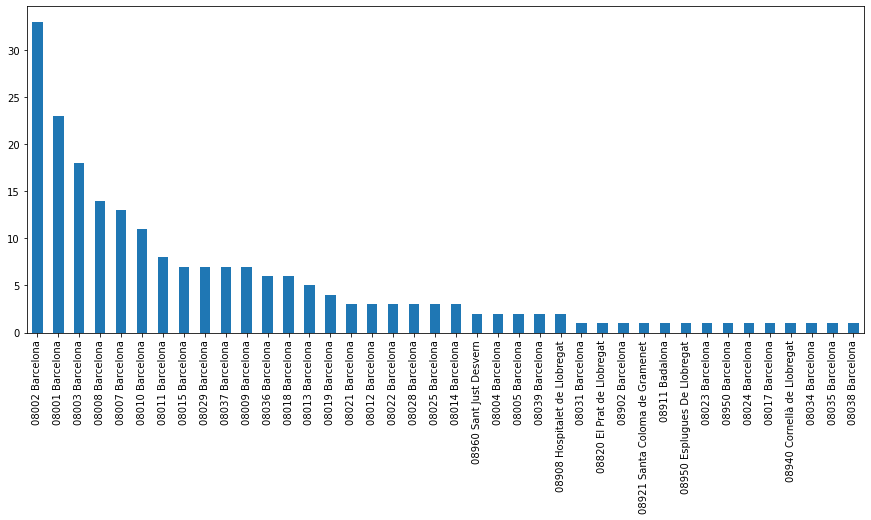

In [21]:

hotel_df.postal_code.value_counts().plot(kind = 'bar', figsize = (15, 6))

In [ ]:
# overview
hotel_df.head()

,name,rating,reviews,price_range
0,Barceló Raval,4.5,56,€€
1,Hotel 1898,4.5,76,€€€
2,W Barcelona,4,176,€€€€
3,Hotel Continental Barcelona,4.5,12,€
4,Pulitzer Barcelona,4,42,€€


In [22]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         240 non-null    object
 1   rating       221 non-null    object
 2   reviews      221 non-null    object
 3   price_range  175 non-null    object
 4   street       240 non-null    object
 5   postal_code  211 non-null    object
dtypes: object(6)
memory usage: 13.1+ KB


In [23]:
# Missing values
hotel_df.isnull().sum().sort_values(ascending=False)

price_range    65
postal_code    29
reviews        19
rating         19
street          0
name            0
dtype: int64

In [24]:
# duplicates values
hotel_df[hotel_df.duplicated()]

,name,rating,reviews,price_range,street,postal_code
114,Gaudi Hotel Barcelona,2.5,15,NaN,"Calle NOU de la Rambla, 12",08001 Barcelona
150,St. Christopher’s Inn,4,20,NaN,,NaN
190,Four Points by Sheraton Barcelona Diagonal,4,26,€€,"Avenida Diagonal, 161",08018 Barcelona
210,Acta BCN 40,5,2,NaN,c/ Joaquin Costa 40,08001 Barcelona
211,OD Barcelona,5,5,NaN,"Carrer d'Aragó, 300",08009 Barcelona
230,Chic&Basic Velvet,1,1,NaN,"Carrer del Consell de Cent, 74",08015 Barcelona


In [25]:
# drop duplicates
hotel_df.drop_duplicates(inplace=True)

#### Cleaning

In [26]:
# Price range (price per person)
# Based on information from yelp and Quora:
# $= under $10. $$=11-30. $$$=31-60. $$$$= over $61
# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))
print(Euro)
mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

hotel_df['price_range'] = hotel_df['price_range'].map(mapper)


0    11
1    12
2    33
3    34
4    66
5    67
dtype: int64


In [30]:
# Rating and number of reviews
hotel_df['rating'] = hotel_df['rating'].apply(lambda x: float(x)) 
hotel_df['reviews'] = hotel_df['reviews'].apply(lambda x: float(x))

hotel_df.describe()

,rating,reviews
count,215.000000,215.000000
mean,3.909302,14.669767
std,0.804431,18.538361
min,1.000000,1.000000
25%,3.500000,4.000000
50%,4.000000,9.000000
75%,4.500000,18.000000
max,5.000000,176.000000


In [41]:
hotel_df['post_num'] = hotel_df.postal_code.str.extract(r'(\d+)').squeeze().apply(lambda x: float(x))

In [42]:
# check cleaning
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         234 non-null    object 
 1   rating       215 non-null    float64
 2   reviews      215 non-null    float64
 3   price_range  174 non-null    object 
 4   street       234 non-null    object 
 5   postal_code  206 non-null    object 
 6   post_num     206 non-null    float64
dtypes: float64(3), object(4)
memory usage: 24.6+ KB


#### Analysis

In [43]:
# Distribution of rating
px.histogram(data_frame=hotel_df, x= 'rating')

In [44]:
# rating normalized
# hotel_df.rating.apply(lambda x:( x - hotel_df.rating.min()) / (hotel_df.rating.max() - hotel_df.rating.max() )  )

In [47]:
# distribution of reviews

px.histogram(data_frame=hotel_df, x = 'reviews')

In [ ]:
px.box(data_frame=hotel_df, x = 'rating', y = 'reviews')
# median would be probably a better central value (most the groups have outliers)

In [ ]:
# Top 20 Most reviews

hotel_df.sort_values(by='reviews', ascending=False).head(20)

,name,rating,reviews,price_range
2,W Barcelona,4.0,176.0,over 67
11,Hotel Arts Barcelona,4.0,103.0,NaN
5,Le Méridien Barcelona,4.0,84.0,[34 - 66]
1,Hotel 1898,4.5,76.0,[34 - 66]
50,Hilton Diagonal Mar,4.0,67.0,[34 - 66]
0,Barceló Raval,4.5,56.0,[12 - 33]
9,Renaissance Barcelona Hotel,4.0,53.0,[34 - 66]
43,Hotel Colón,4.0,48.0,[34 - 66]
6,Hotel Cotton House,4.5,47.0,[34 - 66]
27,Hilton Barcelona Hotel,3.5,46.0,[34 - 66]


In [ ]:
# Price range



In [ ]:
# rating over overiew
hotel_df['rating_reviews'] = hotel_df.rating / hotel_df.reviews

# min max normalization
maximum = hotel_df['rating_reviews'].max()
minimum = hotel_df['rating_reviews'].min()
hotel_df['normalized_rating_reviews'] = hotel_df['rating_reviews'].apply(lambda x: (x - minimum) / (maximum - minimum) )

# Pubs

In [17]:
pub_soup = pd.read_csv('pub_soup.csv').drop(columns='Unnamed: 0').squeeze()
pub_soup2 = pd.read_csv('pub_soup2.csv').drop(columns='Unnamed: 0').squeeze()
print(pub_soup2.index)
print(pub_soup.index)

Index(['Scobies Irish Pub', 'H1898 Rooftopbar', 'L’Ovella Negra',
       'Bobby’s Free', 'Madame George', 'Nevermind', 'The Michael Collins',
       'Bar Rubí', 'Old Fashioned', 'The Bollocks',
       ...
       'Tripode', 'La Pubilla del Taulat', 'Piacere Caffe', 'D9', 'Vanguard',
       'El Ciclista', 'That’s the Way', 'Pipa', 'Sifó', 'Kè?'],
      dtype='object', length=232)
Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')


#### Name

In [296]:
#### Name
name = []
for row in pub_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)


In [ ]:
# It's like there are duplicates
pd.Series(name).value_counts()

Bloomsday Literary Pub        2
The Cottage                   2
The Fastnet                   2
El Rouge                      2
Cheers                        2
                             ..
Barna Brew                    1
Bodegon del Norte - Marzan    1
Ina                           1
Never More                    1
Hemingway                     1
Length: 232, dtype: int64

#### Price range

In [297]:
#### Price range
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

# test
for n, price in zip(name, price_range):
    print(n, price) 

Scobies Irish Pub €
H1898 Rooftopbar €€
L’Ovella Negra €
Bobby’s Free €
Madame George €
Nevermind €
The Michael Collins €€
Bar Rubí €
Old Fashioned €€
The Bollocks €
Biercab €
Flaherty’s €
Dow Jones €€
El Bosc de les Fades €€
Obama €€
Tandem €€
Hemingway €€€
Samba Brasil €€
The George Payne €€
Snooker €€
Limerick nan
Otto Zutz €€
My Bar €€
McCarthy’s nan
Garage Beer Co €
Chill Bar €
JazzMan €€
Polaroid €
George & Dragon €€€
La Cinemateca €€
La Pepita €€
London Bar €
Marsella €
The Black Horse €€
The Philharmonic €€
Elephanta €€
La Birreria €
First Bar €
Hogan’s Australian Pub €€
The Black Lion €
The Lime House €€
Bonavida €
Dublin Sports €€
Musical María €€
Dunne’s Irish Bar €€
Xixbar €€
Gato Negro €
Lennox nan
Le Standard nan
Belushi’s €
Craft Barcelona €
Stoke Bar €€
Fizz Barcelona nan
Bloomsday Irish Pub nan
Barna Brew €
Pippermint €€
Obama Gastropub nan
Oviso €
Touch Music Karaoke €€
Sor Rita €
La Barrica €
Arcano €€€
Bar Zodiaco €
Big Bang Bar €
Maestró €€
Belchica €€
Xpressing Un

#### Rating

In [298]:
#### Rating
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)
        
# test
for n, rat in zip(name, rating):
    print(n, rat) 

Scobies Irish Pub 4.5
H1898 Rooftopbar 4
L’Ovella Negra 4
Bobby’s Free 4.5
Madame George 5
Nevermind 4.5
The Michael Collins 4
Bar Rubí 4.5
Old Fashioned 5
The Bollocks 4
Biercab 4.5
Flaherty’s 4
Dow Jones 3.5
El Bosc de les Fades 4
Obama 3.5
Tandem 5
Hemingway 5
Samba Brasil 4
The George Payne 3.5
Snooker 4
Limerick 4
Otto Zutz 3.5
My Bar 4.5
McCarthy’s 4
Garage Beer Co 4.5
Chill Bar 4.5
JazzMan 4.5
Polaroid 4
George & Dragon 3.5
La Cinemateca 4
La Pepita 4.5
London Bar 4
Marsella 4
The Black Horse 4
The Philharmonic 4
Elephanta 4.5
La Birreria 4.5
First Bar 4.5
Hogan’s Australian Pub 4
The Black Lion 3.5
The Lime House 4
Bonavida 4.5
Dublin Sports 3.5
Musical María 4.5
Dunne’s Irish Bar 3.5
Xixbar 4.5
Gato Negro 4.5
Lennox 4
Le Standard 4.5
Belushi’s 3.5
Craft Barcelona 4
Stoke Bar 4
Fizz Barcelona 4.5
Bloomsday Irish Pub 5
Barna Brew 4.5
Pippermint 3
Obama Gastropub 3.5
Oviso 4
Touch Music Karaoke 4.5
Sor Rita 4.5
La Barrica 3
Arcano 4.5
Bar Zodiaco 4
Big Bang Bar 4
Maestró 4
Belchi

#### Reviews

In [299]:
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')
        
        if rev is not None:
            
            reviews.append(rev.text)


        else:
            reviews.append(np.nan)
        
#test
for n, rev in zip(name, reviews):
    print(n, rev) 

Scobies Irish Pub 26
H1898 Rooftopbar 7
L’Ovella Negra 78
Bobby’s Free 21
Madame George 4
Nevermind 15
The Michael Collins 40
Bar Rubí 38
Old Fashioned 108
The Bollocks 18
Biercab 124
Flaherty’s 41
Dow Jones 47
El Bosc de les Fades 121
Obama 40
Tandem 28
Hemingway 18
Samba Brasil 8
The George Payne 61
Snooker 2
Limerick 2
Otto Zutz 50
My Bar 7
McCarthy’s 4
Garage Beer Co 43
Chill Bar 142
JazzMan 13
Polaroid 31
George & Dragon 2
La Cinemateca 6
La Pepita 514
London Bar 14
Marsella 51
The Black Horse 6
The Philharmonic 14
Elephanta 32
La Birreria 3
First Bar 7
Hogan’s Australian Pub 5
The Black Lion 6
The Lime House 13
Bonavida 10
Dublin Sports 9
Musical María 8
Dunne’s Irish Bar 36
Xixbar 26
Gato Negro 5
Lennox 4
Le Standard 3
Belushi’s 20
Craft Barcelona 20
Stoke Bar 31
Fizz Barcelona 3
Bloomsday Irish Pub 3
Barna Brew 5
Pippermint 11
Obama Gastropub 13
Oviso 64
Touch Music Karaoke 8
Sor Rita 22
La Barrica 1
Arcano 292
Bar Zodiaco 19
Big Bang Bar 10
Maestró 33
Belchica 8
Xpressing Unde

#### Location

In [ ]:
pub_soup2.shape

(232,)

In [ ]:
#### Location

location = [] 
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '--'.join(adress_elements) )

In [ ]:
for n, loc in zip(pub_soup2.index, location):
    print(n,loc)

Scobies Irish Pub Ronda de la Universidad, 8--08007 Barcelona--Spain
H1898 Rooftopbar Les Rambles, 109--08002 Barcelona--Spain
L’Ovella Negra Carrer de les Sitges, 5--08001 Barcelona--Spain
Bobby’s Free Carrer de Pau Claris, 85--08010 Barcelona--Spain
Madame George Carrer de Pujades, 179--08005 Barcelona--Spain
Nevermind Carrer dels Tallers, 68--08001 Barcelona--Spain
The Michael Collins Plaça de la Sagrada Família, 4--08013 Barcelona--Spain
Bar Rubí Carrer Banys Vells, 6--08003 Barcelona--Spain
Old Fashioned Carrer de Santa Teresa, 1--08012 Barcelona--Spain
The Bollocks Carrer Ample, 46--08002 Barcelona--Spain
Biercab Carrer de Muntaner, 55--08011 Barcelona--Spain
Flaherty’s Plaça de Joaquim Xirau, s/n--08002 Barcelona--Spain
Dow Jones Carrer del Bruc, 97--08009 Barcelona--Spain
El Bosc de les Fades Passatge de la Banca, 5--08002 Barcelona--Spain
Obama Gran Via de les Corts Catalanes, 603--08007 Barcelona--Spain
Tandem Carrer d'Aribau, 86--08036 Barcelona--Spain
Hemingway Carrer de Mu

#### Website

In [ ]:
#### Website
website = []
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)



In [ ]:
for n, web in zip(pub_soup2.index, website):
    print(n,web)

Scobies Irish Pub http://scobiesirishpub.com/ind…
H1898 Rooftopbar http://www.hotel1898.com/es/
L’Ovella Negra http://www.ovellanegra.com
Bobby’s Free http://www.bobbysfree.com/en/
Madame George http://www.madamegeorgebar.com
Nevermind nan
The Michael Collins http://www.michaelcollinspubs.…
Bar Rubí nan
Old Fashioned http://cocktailsbarcelona.oldf…
The Bollocks http://www.bollocksbcn.com
Biercab http://biercab.com/
Flaherty’s http://www.pflaherty.com/barce…
Dow Jones http://www.dowjonesbar.com
El Bosc de les Fades http://www.museocerabcn.com/bo…
Obama http://www.obamabcn.com
Tandem nan
Hemingway http://www.hemingwaybcn.com
Samba Brasil nan
The George Payne http://www.thegeorgepayne.com
Snooker http://www.snookerbarcelona.co…
Limerick nan
Otto Zutz http://www.ottozutz.com
My Bar http://mybarcelona.es/
McCarthy’s http://mccarthysbarbarcelona.c…
Garage Beer Co nan
Chill Bar http://www.chillbarcelona.com
JazzMan http://www.jazzmanbcn.com
Polaroid http://www.polaroidbar.es/
George & Dragon 

#### Number of photos

In [ ]:
#### Number of photos
nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)
    



In [ ]:
for n, photo in zip(pub_soup2.index, nb_photos):
    print(n, photo)

Scobies Irish Pub 17
H1898 Rooftopbar 14
L’Ovella Negra 50
Bobby’s Free 42
Madame George 35
Nevermind 26
The Michael Collins 47
Bar Rubí 71
Old Fashioned 218
The Bollocks 22
Biercab 215
Flaherty’s 69
Dow Jones 56
El Bosc de les Fades 100
Obama 66
Tandem 53
Hemingway 45
Samba Brasil 4
The George Payne 40
Snooker 9
Limerick 6
Otto Zutz 18
My Bar 6
McCarthy’s nan
Garage Beer Co nan
Chill Bar 213
JazzMan 32
Polaroid 36
George & Dragon nan
La Cinemateca 5
La Pepita 1065
London Bar 56
Marsella 55
The Black Horse 8
The Philharmonic 6
Elephanta 41
La Birreria 5
First Bar 21
Hogan’s Australian Pub 34
The Black Lion 23
The Lime House 11
Bonavida 31
Dublin Sports 7
Musical María 5
Dunne’s Irish Bar 17
Xixbar 199
Gato Negro 20
Lennox 9
Le Standard nan
Belushi’s 26
Craft Barcelona 45
Stoke Bar 36
Fizz Barcelona nan
Bloomsday Irish Pub 4
Barna Brew 14
Pippermint 31
Obama Gastropub 8
Oviso 70
Touch Music Karaoke 38
Sor Rita 51
La Barrica 15
Arcano 555
Bar Zodiaco 25
Big Bang Bar 43
Maestró 119
Belchi

#### Opening hours


In [ ]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(pub_soup2, pub_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [ ]:
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 

['Scobies Irish Pub', 'Mon', '5:00 PM', '2:30 AM']
['Scobies Irish Pub', 'Tue', '5:00 PM', '2:30 AM']
['Scobies Irish Pub', 'Wed', '5:00 PM', '2:30 AM']
['Scobies Irish Pub', 'Thu', '5:00 PM', '2:30 AM']
['Scobies Irish Pub', 'Fri', '2:00 PM', '3:00 AM']
['Scobies Irish Pub', 'Sat', '2:00 PM', '3:00 AM']
['Scobies Irish Pub', 'Sun', '5:00 PM', '2:30 AM']
['L’Ovella Negra', 'Mon', '9:00 AM', '3:00 AM']
['L’Ovella Negra', 'Tue', '9:00 AM', '3:00 AM']
['L’Ovella Negra', 'Wed', '9:00 AM', '3:00 AM']
['L’Ovella Negra', 'Thu', '9:00 AM', '3:00 AM']
['L’Ovella Negra', 'Fri', '9:00 AM', '3:00 AM']
['L’Ovella Negra', 'Sat', '5:00 PM', '3:00 AM']
['L’Ovella Negra', 'Sun', '5:00 PM', '3:00 AM']
['Bobby’s Free', 'Mon', nan, nan]
['Bobby’s Free', 'Tue', nan, nan]
['Bobby’s Free', 'Wed', '7:00 PM', '3:00 AM']
['Bobby’s Free', 'Thu', '7:00 PM', '3:00 AM']
['Bobby’s Free', 'Fri', '7:00 PM', '3:00 AM']
['Bobby’s Free', 'Sat', '7:00 PM', '3:00 AM']
['Bobby’s Free', 'Sun', '7:00 PM', '3:00 AM']
['Madame 

#### Amenities

#### Pub dataset

In [301]:
# Elements from first page
pub_df = pd.DataFrame({'name':name, 'rating':rating, 'reviews': reviews, 'price_range': price_range})

In [ ]:
pub_df.head()

,name,rating,reviews,price_range
0,Scobies Irish Pub,4.5,26,€
1,H1898 Rooftopbar,4,7,€€
2,L’Ovella Negra,4,78,€
3,Bobby’s Free,4.5,21,€
4,Madame George,5,4,€


# Comparing Businesses

In [ ]:
# resto_df.head()
# pub_df.head()
# hotel_df.head()

,name,rating,reviews,price_range
0,Barceló Raval,4.5,56,€€
1,Hotel 1898,4.5,76,€€€
2,W Barcelona,4,176,€€€€
3,Hotel Continental Barcelona,4.5,12,€
4,Pulitzer Barcelona,4,42,€€


In [302]:
resto_df['Business_type'] = 'restaurant'
hotel_df['Business_type'] = 'hotel'
pub_df['Business_type'] = 'pub'


In [303]:
master_df = pd.concat([resto_df, hotel_df, pub_df])


In [304]:
master_df['reviews'] = master_df.reviews.astype('float')

In [305]:
mininum = master_df.reviews.min()
maximum= master_df.reviews.max()

master_df['norm_reviews'] = master_df.reviews.apply(lambda x: (x - minimum) / (maximum - minimum))


In [306]:
px.histogram(data_frame=master_df, x = 'reviews', color = 'Business_type', opacity= 0.5)

In [310]:
px.box(data_frame= master_df, x = 'Business_type', y = 'norm_reviews')

<AxesSubplot:xlabel='reviews', ylabel='Density'>

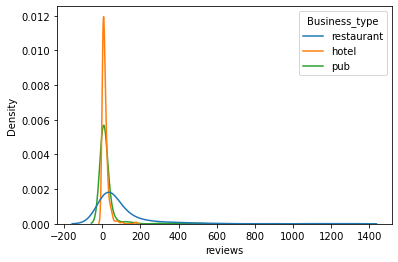

In [307]:

sns.kdeplot(x = master_df.reviews, hue = master_df.Business_type)

In [308]:
master_df.groupby('Business_type')["reviews"].agg(["mean", 'min', 'max'])

,mean,min,max
Business_type,,,
hotel,14.583710,1.0,176.0
pub,21.353712,1.0,514.0
restaurant,93.954167,1.0,1279.0
